<a href="https://colab.research.google.com/github/sumedhakoranga/ML_ZoomCamp_2023/blob/main/Session%202/ML_ZoomCamp_session2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 18:41:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-25 18:41:59 (18.5 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
df=pd.read_csv('housing.csv')

In [4]:
df.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [5]:
df.columns=df.columns.str.lower().str.replace(" ","_")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#EDA
Load the data.
Look at the median_house_value variable. Does it have a long tail?

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='median_house_value', ylabel='Count'>

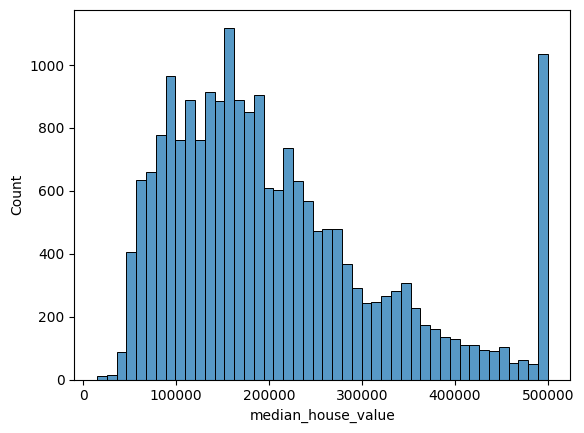

In [8]:
sns.histplot(df.median_house_value)

#####No, it is not having any tail

#Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [9]:
df1= df.loc[df['ocean_proximity'].isin(['INLAND','<1H OCEAN'])]

In [10]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
base=['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [12]:
df1=df1[base]

In [13]:
df1

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


##Question 1
###There's one feature with missing values. What is it?
#####total_rooms
#####total_bedrooms
#####population
#####households

In [14]:
df1.isnull().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

#####Total_bedrooms has missing value.

##Question 2
###What's the median (50% percentile) for variable 'population'?

#####995
#####1095
#####1195
#####1295

In [15]:
df1.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [16]:
np.random.seed(42)

In [56]:
n=len(df1)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
n_val,n_test,n_train

(3137, 3137, 9413)

In [57]:
idx=np.arange(n)

In [46]:
np.random.shuffle(idx)

In [58]:
df_train=df1.iloc[idx[:n_train]]
df_val=df1.iloc[idx[n_train:n_val+n_train]]
df_test=df1.iloc[idx[n_val+n_train:]]

In [59]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [60]:
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,33.72,-117.99,26.0,1787.0,275.0,801.0,270.0,5.5514,255700.0
1,33.72,-117.99,17.0,2801.0,649.0,1473.0,535.0,4.2875,134800.0
2,33.72,-117.99,14.0,2127.0,537.0,1338.0,475.0,3.6280,188500.0
3,33.71,-118.01,18.0,6565.0,1357.0,3079.0,1248.0,4.7515,295600.0
4,33.70,-118.01,24.0,3856.0,567.0,1741.0,588.0,7.2480,302700.0
...,...,...,...,...,...,...,...,...,...
3132,37.96,-121.27,52.0,583.0,114.0,310.0,93.0,2.5625,54200.0
3133,37.98,-121.26,41.0,1633.0,433.0,885.0,413.0,0.9782,54200.0
3134,37.98,-121.25,39.0,1765.0,414.0,1056.0,414.0,1.5329,48300.0
3135,37.97,-121.26,31.0,1189.0,295.0,891.0,292.0,2.5536,50500.0


In [61]:
y_train=np.log1p(df_train.median_house_value.values)
y_test=np.log1p(df_test.median_house_value.values)
y_val=np.log1p(df_val.median_house_value.values)

In [62]:
y_train

array([12.97386569, 12.28765724, 12.41957386, ..., 12.43281372,
       12.74490538, 12.30501712])

In [63]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [65]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832
...,...,...,...,...,...,...,...,...
9408,33.72,-118.03,24.0,5203.0,957.0,2465.0,946.0,5.1630
9409,33.72,-118.04,24.0,7141.0,1330.0,3418.0,1268.0,4.6649
9410,33.73,-117.99,24.0,2104.0,421.0,1181.0,414.0,3.8365
9411,33.73,-118.00,26.0,2236.0,280.0,809.0,282.0,6.7395


##Question 3
#####1. We need to deal with missing values for the column from Q1.
#####2. We have two options: fill it with 0 or with the mean of this variable.
#####3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
#####4. For computing the mean, use the training only!
#####5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
#####6. Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:
#####With 0
#####With mean
#####Both are equally good

##### case1) Filling the missing value with 0

In [82]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [83]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [85]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [87]:
base=['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [98]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred).round(2))

train 0.35
validation 0.35


#####case2) Filling missing value with mean

In [99]:
def prepare_X_mean(df,mean):
    df_num = df[base]
    df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(mean)
    X = df_num.values
    return X

In [100]:
mean=df_train['total_bedrooms'].mean()
X_train = prepare_X_mean(df_train,mean)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred).round(2))

X_val = prepare_X_mean(df_val,mean)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred).round(2))

train 0.35
validation 0.36


##Question 4
#####1. Now let's train a regularized linear regression.
#####2. For this question, fill the NAs with 0.
#####3. Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
#####4. Use RMSE to evaluate the model on the validation dataset.
#####5. Round the RMSE scores to 2 decimal digits.
#####6. Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

#####0
#####0.000001
#####0.001
#####0.0001

In [101]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [103]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [105]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred).round(2))


     0 0.35
 1e-06 0.35
0.0001 0.35
 0.001 0.35
  0.01 0.35
   0.1 0.36
     1 0.36
     5 0.37
    10 0.37


##Question 5
#####1. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
#####2. Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
#####3. For each seed, do the train/validation/test split with 60%/20%/20% distribution.
#####4. Fill the missing values with 0 and train a model without regularization.
#####5. For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
#####6. What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
#####7. Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

#####0.5
#####0.05
#####0.005
#####0.0005

In [107]:
rmse_list=[]
for seed in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    n=len(df1)
    n_val=int(n*0.2)
    n_test=int(n*0.2)
    n_train=n-n_val-n_test
    idx=np.arange(n)
    np.random.shuffle(idx)
    df_train=df1.iloc[idx[:n_train]]
    df_val=df1.iloc[idx[n_train:n_val+n_train]]
    df_test=df1.iloc[idx[n_val+n_train:]]
    df_train=df_train.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    y_train=np.log1p(df_train.median_house_value.values)
    y_test=np.log1p(df_test.median_house_value.values)
    y_val=np.log1p(df_val.median_house_value.values)
    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    y_pred = w_0 + X_train.dot(w)
    # print('train', rmse(y_train, y_pred).round(2))

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    # print('validation', rmse(y_val, y_pred).round(2))
    rmse_list.append(rmse(y_val, y_pred))


In [109]:
np.std(rmse_list).round(3)

0.005

##Question 6
#####1. Split the dataset like previously, use seed 9.
#####2. Combine train and validation datasets.
#####3. Fill the missing values with 0 and train a model with r=0.001.
#####4. What's the RMSE on the test dataset?
Options:

#####0.13
#####0.23
#####0.33
#####0.43

In [110]:
np.random.seed(9)
n=len(df1)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.shuffle(idx)
df_train=df1.iloc[idx[:n_train]]
df_test=df1.iloc[idx[n_train:]]
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
y_train=np.log1p(df_train.median_house_value.values)
y_test=np.log1p(df_test.median_house_value.values)
del df_train['median_house_value']
del df_test['median_house_value']

In [111]:
X_train = prepare_X(df_train)
X_test = prepare_X(df_test)

In [113]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
print(rmse(y_test, y_pred).round(2))

0.33
